# Desicion surface based on MLP


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import sklearn
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense, Dropout

In [51]:
data=pd.read_csv(r"C:\Users\DELL\Desktop\downloads\2.concerticcir1.csv",header=None)

In [52]:
data

,0,1,2
0,-0.383,-0.0908,1.0
1,-0.021,-0.4780,1.0
2,-0.396,-1.2900,0.0
3,-0.618,-0.0638,1.0
4,0.703,-0.1870,1.0
...,...,...,...
95,-0.475,-0.2250,1.0
96,0.126,0.8700,0.0
97,-0.647,-0.3630,1.0
98,0.474,1.0100,0.0


The data[2] is the class lable and has two unique values

In [53]:
data[2].value_counts()

1.0    50
0.0    50
Name: 2, dtype: int64

# Scatterplot of original dataset

In [54]:
x_train,x_test,y_train,y_test=train_test_split(data[[0,1]],data[2],test_size=0.1)

In [55]:
scaler = StandardScaler()


In [56]:
X_train_trf = scaler.fit_transform(x_train)
X_test_trf = scaler.transform(x_test)

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='0', ylabel='1'>

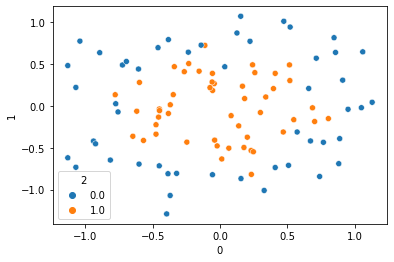

In [57]:
sns.scatterplot(data[0],data[1],hue=data[2])

# Creating hidden layers 

In [58]:
model = Sequential()
#this is a sequential data so initialising sequential is the first step

model.add(Dense(3,activation='sigmoid',input_dim=2,kernel_initializer="glorot_uniform"))
#to the sequential data we are making a dense layer with activation fiunction, input_dim is the dimension of dataset
# kernel_initialiser you can use based on your activation function
model.add(Dense(2,activation='sigmoid',kernel_initializer="glorot_uniform"))
model.add(Dense(1,activation='sigmoid',kernel_initializer="glorot_uniform"))

Here I created four dense layers that is nothing but fully connected layers .

activation function used is relu which works best with the combination of he_normal/unoform kernel_initializer

the final layer should be sigmoid activation function as it is dealing with binary classification only one output is required

In [59]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 3)                 9         
                                                                 
 dense_10 (Dense)            (None, 2)                 8         
                                                                 
 dense_11 (Dense)            (None, 1)                 3         
                                                                 
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


Summary describes total layers 

Total trainable parameters

remembering one most importnt thing is every neuron has a bias 



# Compiling

In [60]:
model.compile(optimizer="Adam",loss="binary_crossentropy")

compiling we get to know the loss fuction and optimal weight by optimizer accuracy by metrics

optimizer which is widely used is "adam" 

as it is two class classification we use binary_crossentropy as loss function 

# Training


In [61]:
tr=model.fit(x_train,y_train,batch_size=10,epochs=20,verbose=1,validation_split=0.2)

Epoch 1/20
8/8 [==============================] - 2s 54ms/step - loss: 0.7892 - val_loss: 0.6345
Epoch 2/20
8/8 [==============================] - 0s 14ms/step - loss: 0.7859 - val_loss: 0.6345
Epoch 3/20
8/8 [==============================] - 0s 11ms/step - loss: 0.7827 - val_loss: 0.6344
Epoch 4/20
8/8 [==============================] - 0s 12ms/step - loss: 0.7789 - val_loss: 0.6344
Epoch 5/20
8/8 [==============================] - 0s 11ms/step - loss: 0.7750 - val_loss: 0.6345
Epoch 6/20
8/8 [==============================] - 0s 21ms/step - loss: 0.7723 - val_loss: 0.6347
Epoch 7/20
8/8 [==============================] - 0s 11ms/step - loss: 0.7687 - val_loss: 0.6348
Epoch 8/20
8/8 [==============================] - 0s 11ms/step - loss: 0.7658 - val_loss: 0.6351
Epoch 9/20
8/8 [==============================] - 0s 11ms/step - loss: 0.7632 - val_loss: 0.6354
Epoch 10/20
8/8 [==============================] - 0s 11ms/step - loss: 0.7602 - val_loss: 0.6358
Epoch 11/20
8/8 [============

for training we use training set

when we give batchsize internally is is using mini_batch SGD 

epochs used are 20 , it gives loss function for every epoch 

1 epoch is equal to all the datapoints once finish iteration 

here total 100 datapoints batch_size is 10 that means 10 batchs , that is if 10 batchs finish their iteration once 

it is 1 epoch and 1 loss function

In [62]:
pred=model.predict(x_train)

3/3 [==============================] - 0s 6ms/step


for predicting the model accuracy we pass x_train set and predict the model

In [63]:
predi=np.where(pred>0.5,1,0).flatten()

as the class label here are 1 and 0,using numpy.where function we label the predicted values and flatten them to an array

and find the accuracy score

In [64]:
accuracy_score(y_train,predi)

0.5

In [25]:
tl=tr.history["loss"]
cvl=tr.history["val_loss"]

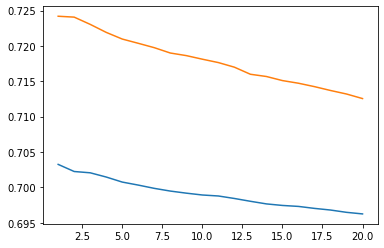

In [26]:
plt.plot(range(1,21),tl,label="training_loss")
plt.plot(range(1,21),cvl,label="crossval_loss")

In [27]:
from mlxtend.plotting import plot_decision_regions

3888/3888 [==============================] - 8s 2ms/step


<AxesSubplot:>

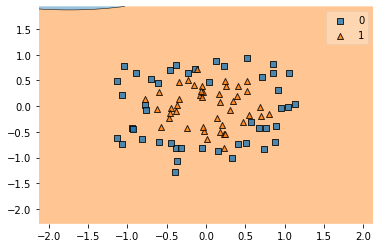

In [28]:
plot_decision_regions(x_train[[0,1]].values,y_train.values.astype(int),clf=model)

In [29]:
model1 = Sequential()
model1.add(Dense(3,activation='relu',input_dim=2,kernel_initializer="he_normal"))
model1.add(Dense(2,activation='relu',kernel_initializer="he_normal"))
model1.add(Dense(1,activation='sigmoid'))

In [30]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 3)                 9         
                                                                 
 dense_4 (Dense)             (None, 2)                 8         
                                                                 
 dense_5 (Dense)             (None, 1)                 3         
                                                                 
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


In [31]:
model1.compile(optimizer="Adam",loss="binary_crossentropy")

In [32]:
save1=model1.fit(x_train,y_train,batch_size=10,epochs=20,verbose=1,validation_split=0.2)

Epoch 1/20
8/8 [==============================] - 2s 54ms/step - loss: 0.7566 - val_loss: 1.0065
Epoch 2/20
8/8 [==============================] - 0s 19ms/step - loss: 0.7530 - val_loss: 0.9962
Epoch 3/20
8/8 [==============================] - 0s 17ms/step - loss: 0.7498 - val_loss: 0.9873
Epoch 4/20
8/8 [==============================] - 0s 17ms/step - loss: 0.7476 - val_loss: 0.9793
Epoch 5/20
8/8 [==============================] - 0s 14ms/step - loss: 0.7449 - val_loss: 0.9726
Epoch 6/20
8/8 [==============================] - 0s 11ms/step - loss: 0.7427 - val_loss: 0.9645
Epoch 7/20
8/8 [==============================] - 0s 11ms/step - loss: 0.7405 - val_loss: 0.9570
Epoch 8/20
8/8 [==============================] - 0s 11ms/step - loss: 0.7379 - val_loss: 0.9511
Epoch 9/20
8/8 [==============================] - 0s 13ms/step - loss: 0.7362 - val_loss: 0.9448
Epoch 10/20
8/8 [==============================] - 0s 11ms/step - loss: 0.7341 - val_loss: 0.9399
Epoch 11/20
8/8 [============

In [33]:
tl1=save1.history["loss"]
cvl1=save1.history["val_loss"]

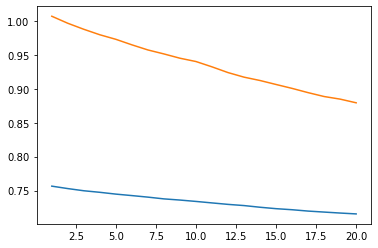

In [34]:
plt.plot(range(1,21),tl1,label="training_loss")
plt.plot(range(1,21),cvl1,label="crossval_loss")

In [35]:
pred1=model1.predict(x_train)

3/3 [==============================] - 0s 5ms/step


In [36]:
predi1=np.where(pred1>0.5,1,0).flatten()

In [37]:
accuracy_score(y_train,predi1)

0.4666666666666667

## 

In [38]:
from mlxtend.plotting import plot_decision_regions;

3888/3888 [==============================] - 8s 2ms/step


<AxesSubplot:>

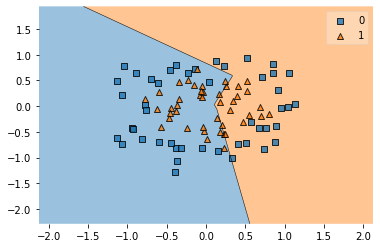

In [39]:
plot_decision_regions(x_train[[0,1]].values,y_train.values.astype(int),clf=model1)

In [65]:
model2 = Sequential()
model2.add(Dense(8,activation='relu',input_dim=2,kernel_initializer="he_uniform"))
model2.add(Dropout(0.6))

model2.add(Dense(6,activation='relu',kernel_initializer="he_uniform"))
model2.add(Dropout(0.6))

model2.add(Dense(1,activation='sigmoid'))

In [66]:
model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 8)                 24        
                                                                 
 dropout_2 (Dropout)         (None, 8)                 0         
                                                                 
 dense_13 (Dense)            (None, 6)                 54        
                                                                 
 dropout_3 (Dropout)         (None, 6)                 0         
                                                                 
 dense_14 (Dense)            (None, 1)                 7         
                                                                 
Total params: 85
Trainable params: 85
Non-trainable params: 0
_________________________________________________________________


In [67]:
model2.compile(optimizer="Adam",loss="binary_crossentropy",metrics=["accuracy"])

In [68]:
save=model2.fit(x_train,y_train,batch_size=10,epochs=50,verbose=1,validation_split=0.2)

Epoch 1/50
8/8 [==============================] - 2s 59ms/step - loss: 0.6683 - accuracy: 0.5139 - val_loss: 0.6086 - val_accuracy: 0.6111
Epoch 2/50
8/8 [==============================] - 0s 12ms/step - loss: 0.8752 - accuracy: 0.5278 - val_loss: 0.6090 - val_accuracy: 0.6111
Epoch 3/50
8/8 [==============================] - 0s 16ms/step - loss: 0.9790 - accuracy: 0.4444 - val_loss: 0.6081 - val_accuracy: 0.6111
Epoch 4/50
8/8 [==============================] - 0s 13ms/step - loss: 0.8077 - accuracy: 0.5556 - val_loss: 0.6077 - val_accuracy: 0.6111
Epoch 5/50
8/8 [==============================] - 0s 14ms/step - loss: 1.2892 - accuracy: 0.3889 - val_loss: 0.6069 - val_accuracy: 0.6111
Epoch 6/50
8/8 [==============================] - 0s 14ms/step - loss: 0.7943 - accuracy: 0.4861 - val_loss: 0.6059 - val_accuracy: 0.6111
Epoch 7/50
8/8 [==============================] - 0s 12ms/step - loss: 0.9211 - accuracy: 0.5278 - val_loss: 0.6052 - val_accuracy: 0.6111
Epoch 8/50
8/8 [===========

In [69]:
tl=save.history["loss"]
cvl=save.history["val_loss"]

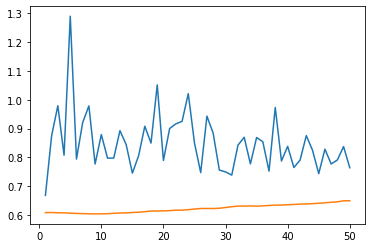

In [70]:
plt.plot(range(1,51),tl,label="training_loss")
plt.plot(range(1,51),cvl,label="crossval_loss")

In [71]:
pred2=model2.predict(x_train)

3/3 [==============================] - 0s 10ms/step


In [72]:
predi2=np.where(pred2>0.5,1,0).flatten()

In [73]:
accuracy_score(y_train,predi2)

0.5666666666666667

In [74]:
from mlxtend.plotting import plot_decision_regions;

3888/3888 [==============================] - 9s 2ms/step


<AxesSubplot:>

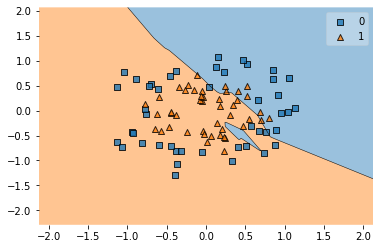

In [75]:
plot_decision_regions(x_train[[0,1]].values,y_train.values.astype(int),clf=model2)

In [39]:
model1.get_weights()

[array([[ 0.26630607, -0.60293555, -0.8307822 ],
        [ 0.11086889,  0.5656731 , -0.58236635]], dtype=float32),
 array([-0.01944623, -0.01643853,  0.04026374], dtype=float32),
 array([[ 0.20246734, -0.02796446],
        [ 0.07834674,  0.42243755],
        [ 0.6676169 , -0.42778158]], dtype=float32),
 array([-0.00305589, -0.01439422], dtype=float32),
 array([[-0.29131734],
        [ 0.24279626]], dtype=float32),
 array([0.00251699], dtype=float32)]

In [38]:
model.get_weights()

[array([[-0.45051998, -0.0107311 ,  0.48471105],
        [-0.19976163,  0.6848316 ,  0.637992  ]], dtype=float32),
 array([0., 0., 0.], dtype=float32),
 array([[ 0.5777775 , -0.9711572 ],
        [-0.8912208 ,  0.9954059 ],
        [ 0.34739935,  0.73109996]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[ 0.24879014],
        [-1.1815538 ]], dtype=float32),
 array([0.], dtype=float32)]